# SVM基础部分.
对于如下的分类问题, 可以看到我们有很多分类的直线:
![svm-01.png](svm-01.png)
![svm-02.png](svm-02.png)
而我们想要得到最好的分类结果, 那么我们可以需要让离分类边界最近的点离分类边界有最大的距离, 就像下面这个样子:

![svm-03.png](svm-03.png)
我们想要的就是margin 最大 也就是d 最大.

回想以前的点(x,y)到直线Ax+By+C的距离公式:
$$\frac{|Ax+By+C|}{\sqrt[2]{A^2+B^2}}$$

那么类似的对分类直线(b就是最后的截距, w是n*1的向量):
$$w^Tx+b=0$$
可以看到分母跟b是没有关系的. 那么任意一个点到该分类直线的距离是:
$$\frac{|w^T+b|}{||w||}$$
其中:
$$||w||=\sqrt[2]{w_1^2 + w_2^2 + .... + w_n^n}$$

那么对于分类正确的数据(hard margin SVM要求如此):

(1) 对$y^{(i)}=1$有:
$$\frac{w^Tx^{(i)} + b}{||w||}\ge d$$

(2) 对于$y^{(i)}=-1$有:
$$\frac{w^Tx^{(i)} + b}{||w||}\le -d$$

那么我们两边同时除d的话,切换为:

(1) 对于$y^{(i)}=1$有:
$$\frac{w^Tx^{(i)} + b}{||w||d}\ge 1$$

(2) 对于$y^{(i)}=-1$有:
$$\frac{w^Tx^{(i)} + b}{||w||d}\le -1$$

换一个记号:
(1) 对于$y^{(i)}=1$有:
$$w_d^Tx^{(i)} + b_d\ge 1$$

(2) 对于$y^{(i)}=-1$有:
$$w_d^Tx^{(i)} + b_d\le -1$$


将$w_d$直接替换为w, 那么这两个不等式可以合为1个:
$$y^{(i)}(w^Tx^{(i)} + b)\ge 1$$

对于任意支撑向量x:
$$max\frac{w^Tx^{(i)} + b}{||w||}$$
因为$w^Tx+b = 1$ 那么也就是$max\frac{1}{||w||}$, 

SVM结论:
<b>再替换下就是</b> 
$$min\frac{1}{2}||w||^2$$
s.t.
$$y^{(i)}(w^Tx^{(i)} + b)\ge 1$$


# 有条件的最优化问题
一般无条件的都是用求导来解决.
而有条件问题的都是使用$\lambda$算子解决.

# soft margin SVM
前面的hard marin svm 要求太过严格, 必须要求线性可分(可能是直线, 也可能是超平面的一个分割)
对于如下的例子, 也许有错误的数据或者outlier, 很明显如果采用hard svm 可以看到我们模型的泛化能力有可能很弱:
![svm-04.png](svm-04.png)
或者像下面的这样,根本不可分(如果我们对hard margin svm 不做任何容错处理的话我们就无法工作了):
![svm-05.png](svm-05.png)

那么我们宽松下条件, 就是 <font color=red>soft margin svm</font> 
$$min\frac{1}{2}||w||^2$$
s.t.
$$y^{(i)}(w^Tx^{(i)} + b)\ge 1 - \zeta_i  $$  ($\zeta_i\ge 0$)
![svm-06.png](svm-06.png)
注意到:$\zeta_i$是对每个数据都有一个值, 如果这个值很大的话, 可想而知,容错率范围大大了.
那么我们用如下的方式来表达不能让容错率太大
(如果我们有m个数据的话):
$$min\frac{1}{2}||w||^2 + \sum_{i=1}^{m}{\zeta_i}$$

如果我们需要平衡w和容错率之间的关系(加入新的超参数C, C 越大, 那么需要$\zeta$越小, 那么就会退化为Hard Margin, 也叫<font color=red>L1正则(提高泛化能力)</font>):
$$min\frac{1}{2}||w||^2 + C\sum_{i=1}^{m}{\zeta_i}$$

可想而知L2正则就是:
$$min\frac{1}{2}||w||^2 + C\sum_{i=1}^{m}{\zeta_i^2}$$




# 使用scikit中的SVM算法
Note:
这里依然需要对数据做标准化处理(需要很小的<b>距离</b>)
![svm-07.png](svm-07.png)


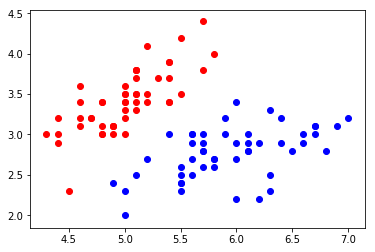

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

# 取y=0 和 y=1的类别, 并且取 前2个特征
x = x[y<2,:2]
y = y[y<2]

plt.scatter(x[y==0, 0], x[y==0, 1], color="red")
plt.scatter(x[y==1, 0], x[y==1, 1], color="blue")
plt.show()

# 做标准化处理
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
standardScaler.fit(x)
x_standard = standardScaler.transform(x)

# SVC - support vector classifier
from sklearn.svm import LinearSVC
svc = LinearSVC(C=1e8)
svc.fit(x_standard, y)

这里面主要涉及到SVM相关. 该示例依然需要testSet.txt文件, 与ch05 中的文件相同

In [1]:
def loadDataSet(fileName):
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = line.strip().split("\t")
        dataMat.append([float(lineArr[0]), float(lineArr[1])])
        labelMat.append(float(lineArr[2]))
    return dataMat, labelMat

# 生成一个不等于i的在[0, m) 之间的随机整数
def selectJrand(i,m):
    j=i
    while(j==i):
        j = int(random.uniform(0,m))
    
    return j

# 返回一个在[H,L]之间的aj
def clipAlpha(aj, H, L):
    if aj > H:
        aj = H
    if L > aj:
        aj = L
    return aj
        
dataArr, labelArr = loadDataSet("testSet.txt")
print(labelArr)

[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0]


In [2]:
# 简化版本的SMO算法
from numpy import *


def smoSimple(dataMatIn, classLabels, C, toler, maxIter):
    dataMatrix = mat(dataMatIn); labelMat = mat(classLabels).transpose()
    b = 0; m,n = shape(dataMatrix)
    alphas = mat(zeros((m,1)))
    iter = 0
    while (iter < maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            fXi = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[i,:].T)) + b
            Ei = fXi - float(labelMat[i])#if checks if an example violates KKT conditions
            if ((labelMat[i]*Ei < -toler) and (alphas[i] < C)) or ((labelMat[i]*Ei > toler) and (alphas[i] > 0)):
                j = selectJrand(i,m)
                fXj = float(multiply(alphas,labelMat).T*(dataMatrix*dataMatrix[j,:].T)) + b
                Ej = fXj - float(labelMat[j])
                alphaIold = alphas[i].copy(); alphaJold = alphas[j].copy();
                if (labelMat[i] != labelMat[j]):
                    L = max(0, alphas[j] - alphas[i])
                    H = min(C, C + alphas[j] - alphas[i])
                else:
                    L = max(0, alphas[j] + alphas[i] - C)
                    H = min(C, alphas[j] + alphas[i])
                if L==H: print("L==H"); continue
                eta = 2.0 * dataMatrix[i,:]*dataMatrix[j,:].T - dataMatrix[i,:]*dataMatrix[i,:].T - dataMatrix[j,:]*dataMatrix[j,:].T
                if eta >= 0: print("eta>=0"); continue
                alphas[j] -= labelMat[j]*(Ei - Ej)/eta
                alphas[j] = clipAlpha(alphas[j],H,L)
                if (abs(alphas[j] - alphaJold) < 0.00001): print("j not moving enough"); continue
                alphas[i] += labelMat[j]*labelMat[i]*(alphaJold - alphas[j])#update i by the same amount as j
                                                                        #the update is in the oppostie direction
                b1 = b - Ei- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[i,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[i,:]*dataMatrix[j,:].T
                b2 = b - Ej- labelMat[i]*(alphas[i]-alphaIold)*dataMatrix[i,:]*dataMatrix[j,:].T - labelMat[j]*(alphas[j]-alphaJold)*dataMatrix[j,:]*dataMatrix[j,:].T
                if (0 < alphas[i]) and (C > alphas[i]): b = b1
                elif (0 < alphas[j]) and (C > alphas[j]): b = b2
                else: b = (b1 + b2)/2.0
                alphaPairsChanged += 1
                print("iter: %d i:%d, pairs changed %d") % (iter,i,alphaPairsChanged)
        if (alphaPairsChanged == 0): iter += 1
        else: iter = 0
        print("iteration number:", iter)
    return b,alphas

b, alphas = smoSimple(dataArr, labelArr, 0.6, 0.001, 40)
print("Final b:", b)
print("Final alphas:", alphas)

j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
L==H
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
iteration number: 1
L==H
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough


L==H
L==H
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
iteration number: 16
L==H
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
iteration number: 17
j not moving enough
L==H
L==H
L==H
j not moving enoug

L==H
L==H
j not moving enough
L==H
L==H
L==H
L==H
L==H
j not moving enough
iteration number: 31
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
L==H
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
j not moving enough
L==H
L==H
L==H
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
j not moving enough
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
L==H
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
L==H
iteration number: 32
j not moving enough
L==H
j not moving enough
j not moving enough
L==H
L==H
j not moving enough
j not moving enough
j not moving enough
L==H
j not moving enough
L==H
L==H
j not moving enough
L==H
L==H
L==H
j not mo